In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('data.csv')

In [4]:
# General overview
print("Shape of the dataset:", data.shape)
print("Data types:", data.dtypes)
print("Summary statistics for numerical columns:", data.describe())
print("Missing values:", data.isnull().sum())


Shape of the dataset: (11914, 16)
Data types: Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object
Summary statistics for numerical columns:                Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     

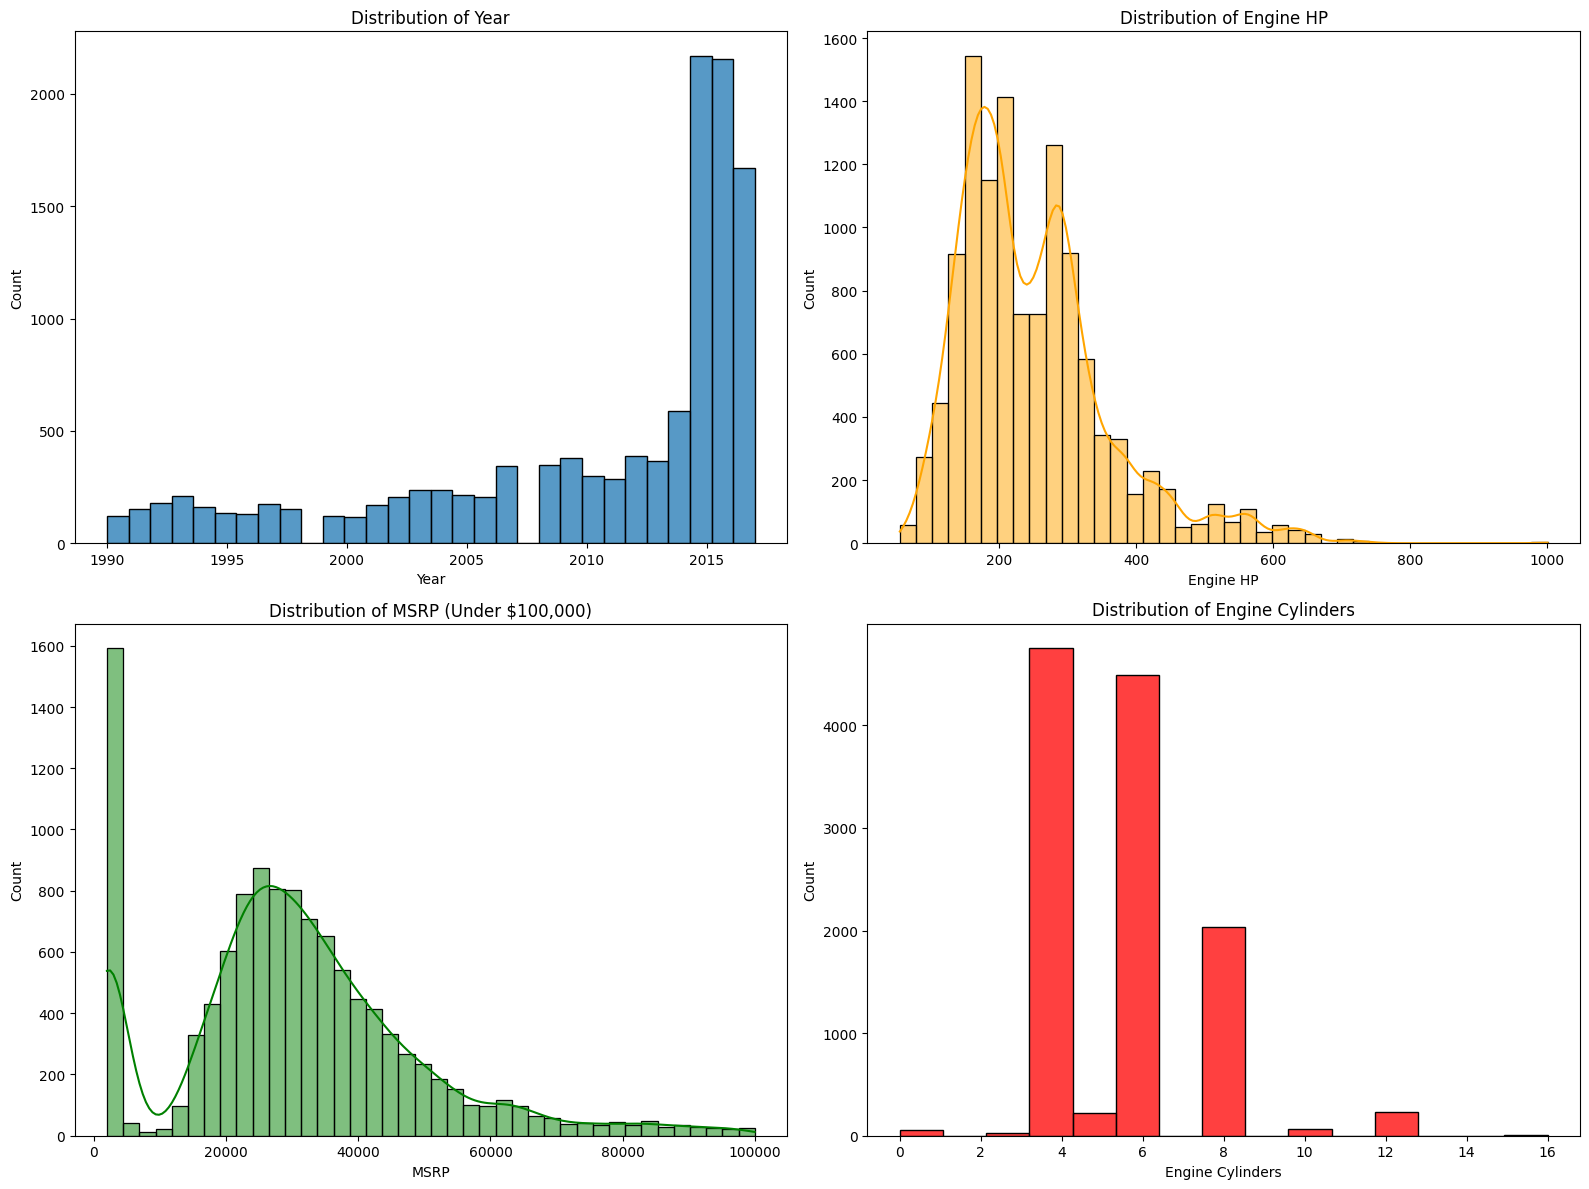

In [10]:
# Distribution of key numerical features
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.histplot(data['Year'], bins=30, kde=False)
plt.title('Distribution of Year')

plt.subplot(2, 2, 2)
sns.histplot(data['Engine HP'], bins=40, kde=True, color='orange')
plt.title('Distribution of Engine HP')

plt.subplot(2, 2, 3)
sns.histplot(data[data['MSRP'] < 100000]['MSRP'], bins=40, kde=True, color='green')
plt.title('Distribution of MSRP (Under $100,000)')

plt.subplot(2, 2, 4)
sns.histplot(data['Engine Cylinders'].dropna(), bins=15, kde=False, color='red')
plt.title('Distribution of Engine Cylinders')

plt.tight_layout()
plt.show()

<ipython-input-11-cdc1c64d51ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Make', data=data[data['Make'].isin(top_10_makes)], order=top_10_makes, ax=ax[0, 0], palette="viridis")
<ipython-input-11-cdc1c64d51ad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Transmission Type', data=data, ax=ax[0, 1], palette="rocket")
<ipython-input-11-cdc1c64d51ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Driven_Wheels', data=data, ax=ax[1, 0], palette="mako")
<ipython-input-11-cdc1c64d51ad>:13: FutureWarning: 

Passing `palet

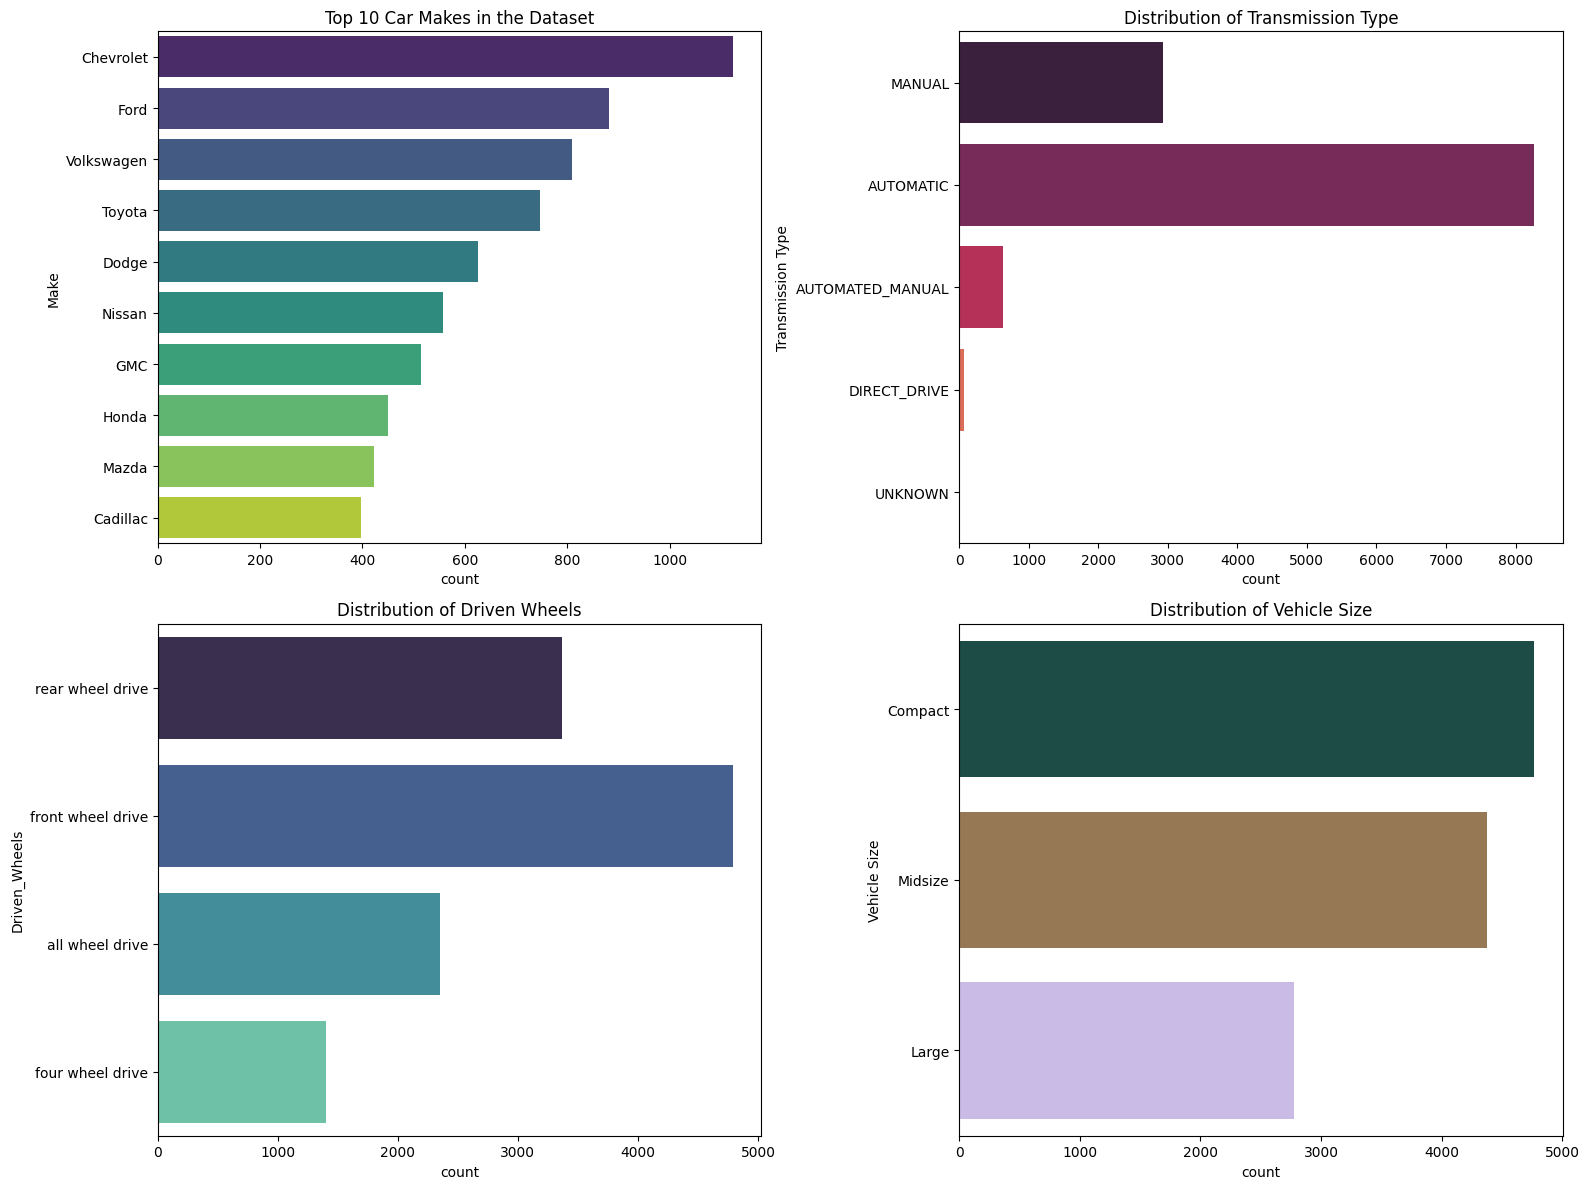

In [11]:
# Distribution of key categorical features
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
top_10_makes = data['Make'].value_counts().head(10).index
sns.countplot(y='Make', data=data[data['Make'].isin(top_10_makes)], order=top_10_makes, ax=ax[0, 0], palette="viridis")
ax[0, 0].set_title('Top 10 Car Makes in the Dataset')

sns.countplot(y='Transmission Type', data=data, ax=ax[0, 1], palette="rocket")
ax[0, 1].set_title('Distribution of Transmission Type')

sns.countplot(y='Driven_Wheels', data=data, ax=ax[1, 0], palette="mako")
ax[1, 0].set_title('Distribution of Driven Wheels')

sns.countplot(y='Vehicle Size', data=data, ax=ax[1, 1], palette="cubehelix")
ax[1, 1].set_title('Distribution of Vehicle Size')

plt.tight_layout()
plt.show()

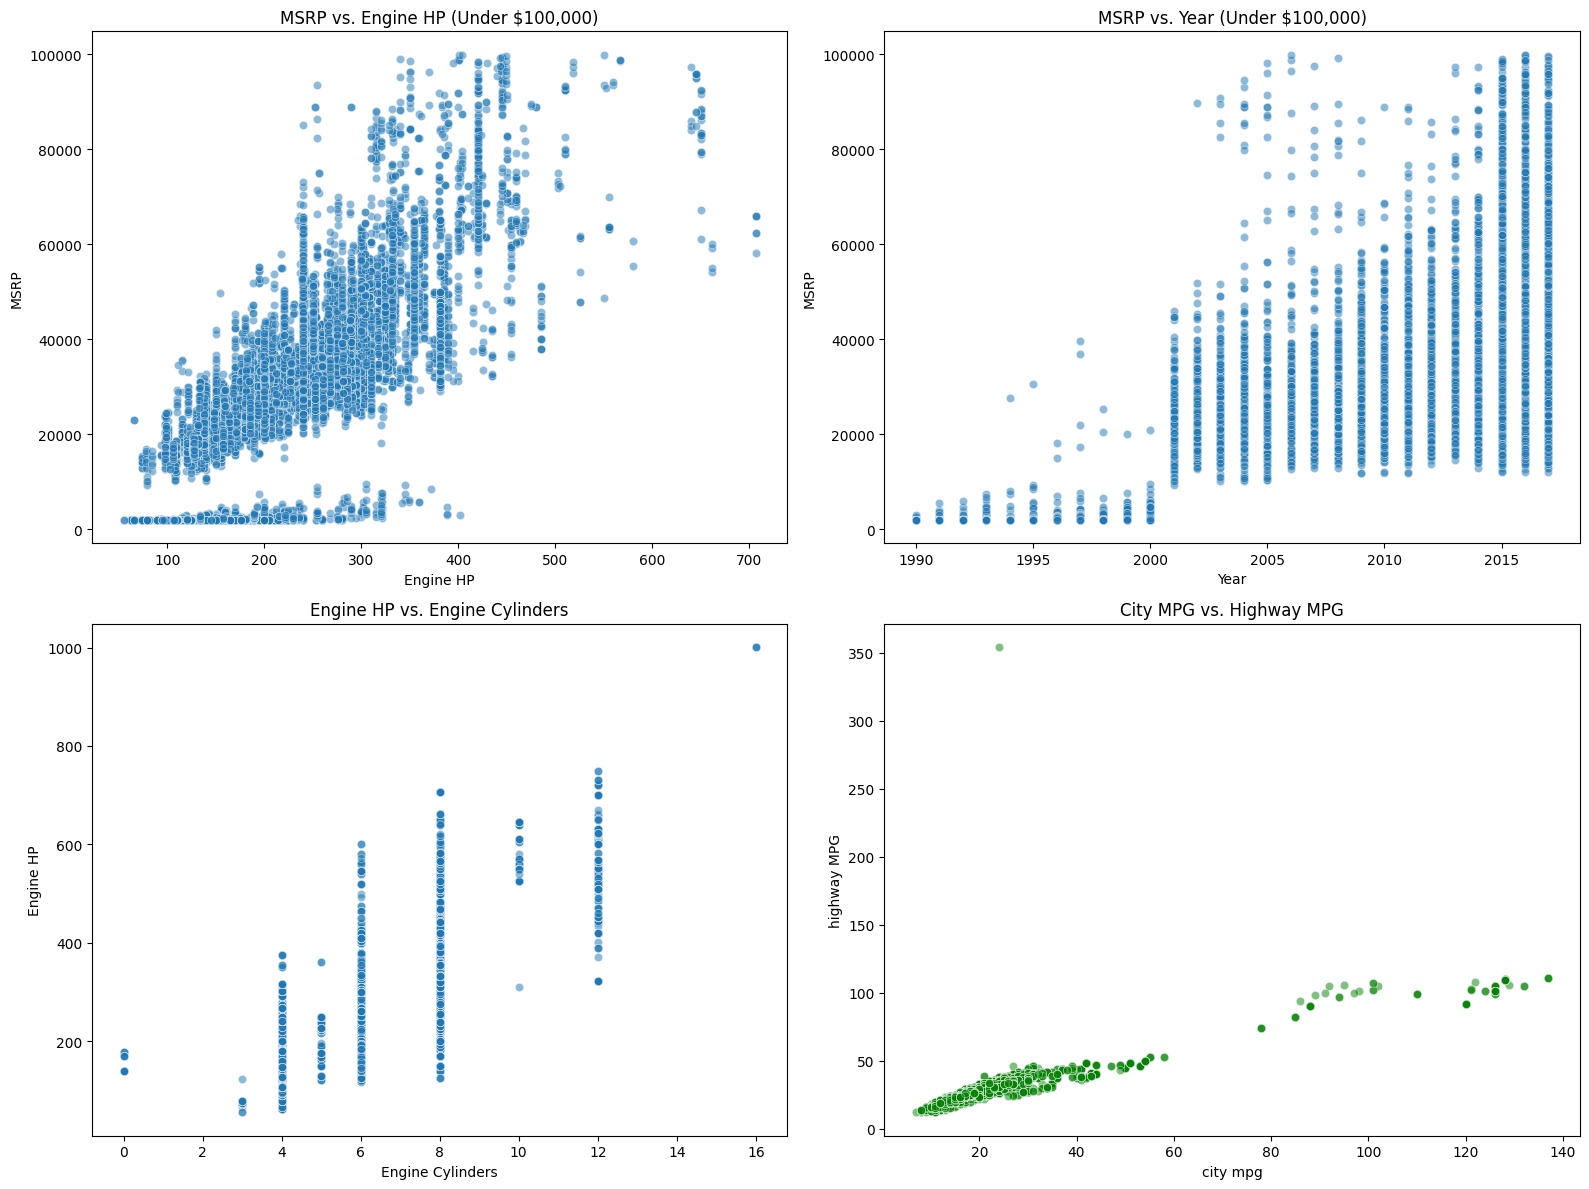

In [12]:
# Visualizing relationships between variables
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='Engine HP', y='MSRP', data=data[data['MSRP'] < 100000], ax=ax[0, 0], alpha=0.5)
ax[0, 0].set_title('MSRP vs. Engine HP (Under $100,000)')

sns.scatterplot(x='Year', y='MSRP', data=data[data['MSRP'] < 100000], ax=ax[0, 1], alpha=0.5)
ax[0, 1].set_title('MSRP vs. Year (Under $100,000)')

sns.scatterplot(x='Engine Cylinders', y='Engine HP', data=data, ax=ax[1, 0], alpha=0.5)
ax[1, 0].set_title('Engine HP vs. Engine Cylinders')

sns.scatterplot(x='city mpg', y='highway MPG', data=data, ax=ax[1, 1], alpha=0.5, color='green')
ax[1, 1].set_title('City MPG vs. Highway MPG')

plt.tight_layout()
plt.show()

In [13]:
# Handling missing values

# For 'Engine Fuel Type', fill missing values with the mode
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)

# For 'Engine HP' and 'Engine Cylinders', fill missing values with the median
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace=True)

# For 'Number of Doors', fill missing values with the median
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace=True)

# For 'Market Category', label missing values as "Unknown"
data['Market Category'].fillna("Unknown", inplace=True)

# Verify the changes by checking for missing values again
missing_values_after = data.isnull().sum()
missing_values_after

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

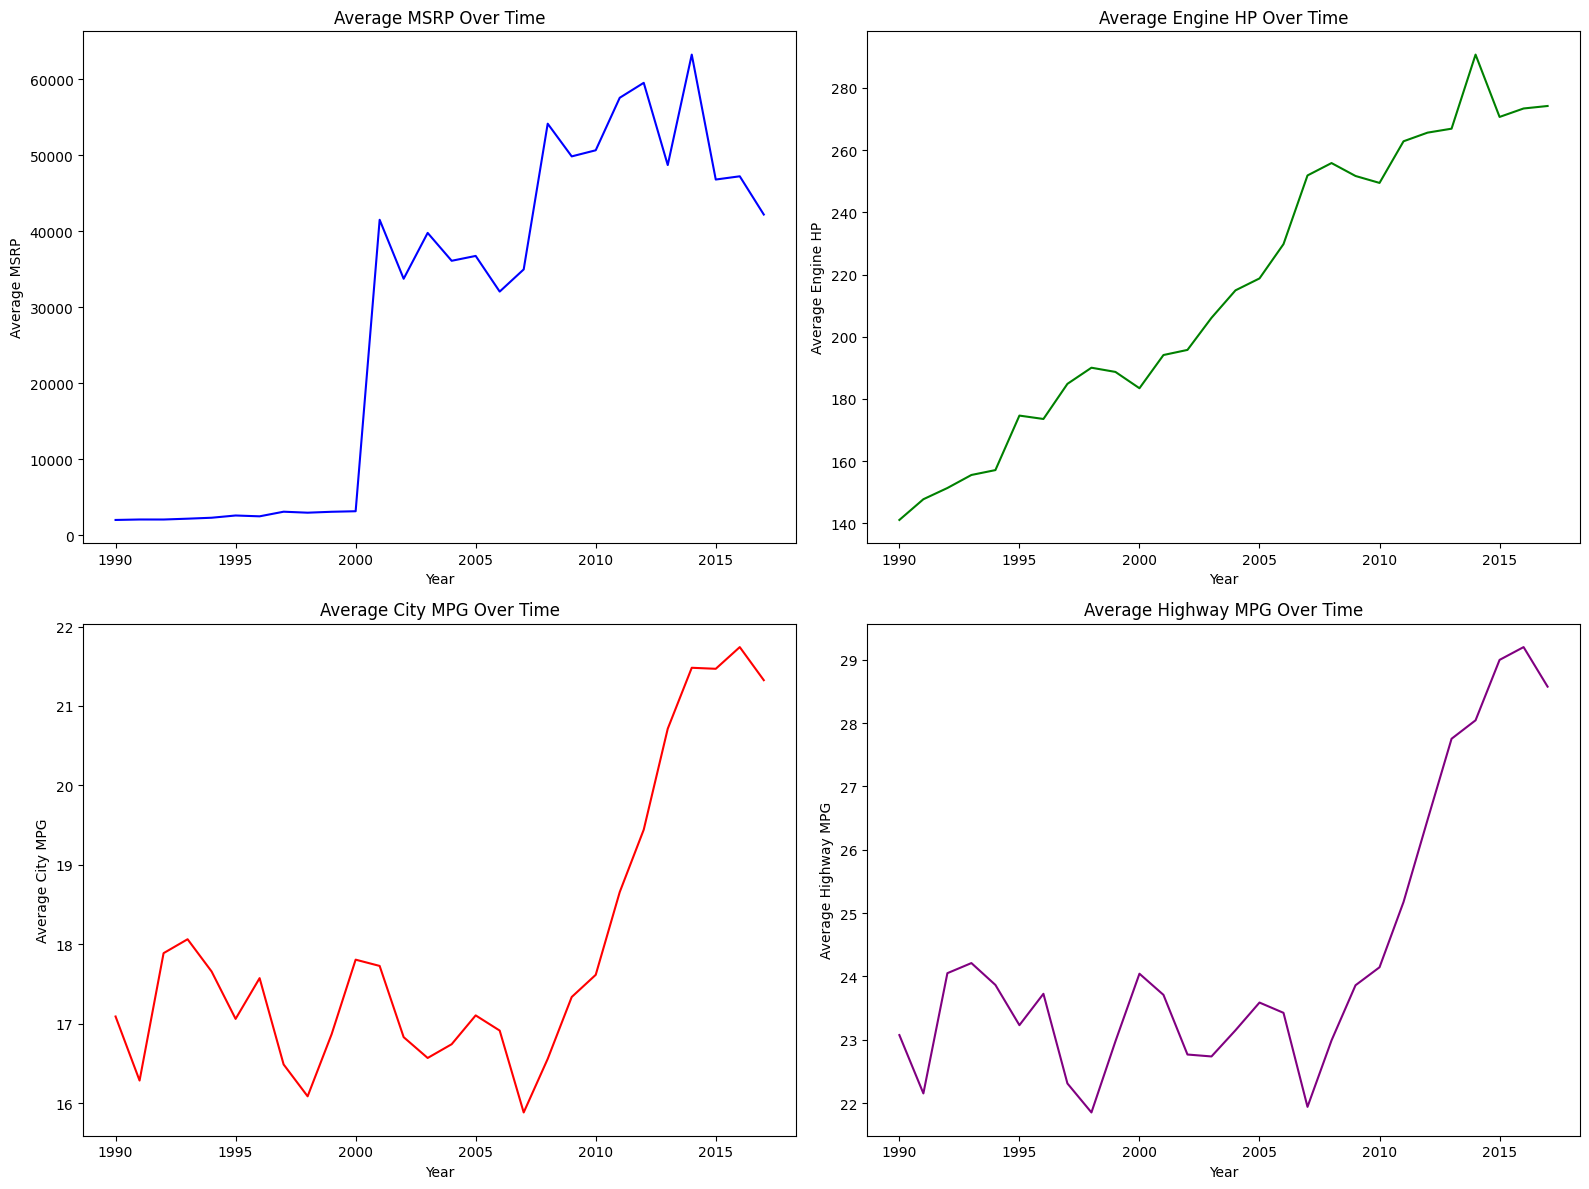

In [15]:
# Temporal Trends Analysis for MSRP, Engine HP, and MPG over the Years
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Trends in Average MSRP by Year
data.groupby('Year')['MSRP'].mean().plot(ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Average MSRP Over Time')
ax[0, 0].set_ylabel('Average MSRP')

# Trends in Average Engine HP by Year
data.groupby('Year')['Engine HP'].mean().plot(ax=ax[0, 1], color='green')
ax[0, 1].set_title('Average Engine HP Over Time')
ax[0, 1].set_ylabel('Average Engine HP')

# Trends in Average City MPG by Year
data.groupby('Year')['city mpg'].mean().plot(ax=ax[1, 0], color='red')
ax[1, 0].set_title('Average City MPG Over Time')
ax[1, 0].set_ylabel('Average City MPG')

# Trends in Average Highway MPG by Year
data.groupby('Year')['highway MPG'].mean().plot(ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Average Highway MPG Over Time')
ax[1, 1].set_ylabel('Average Highway MPG')

plt.tight_layout()
plt.show()

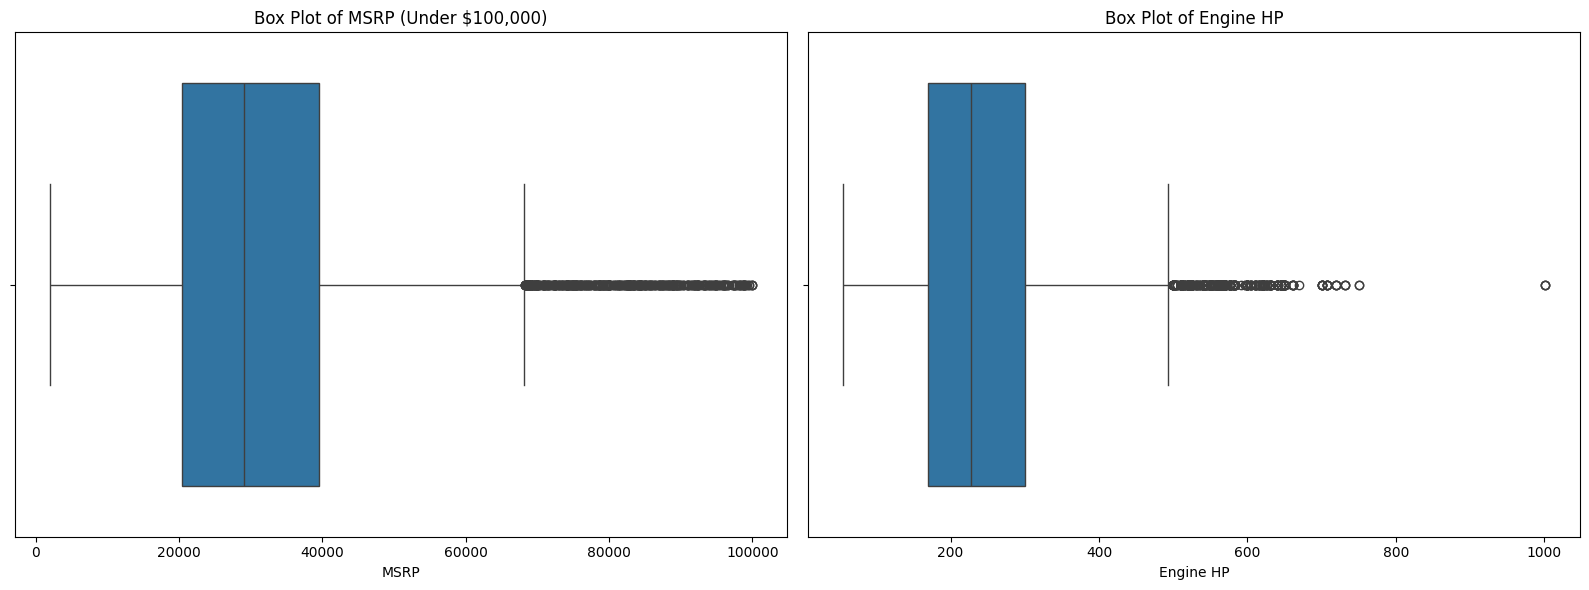

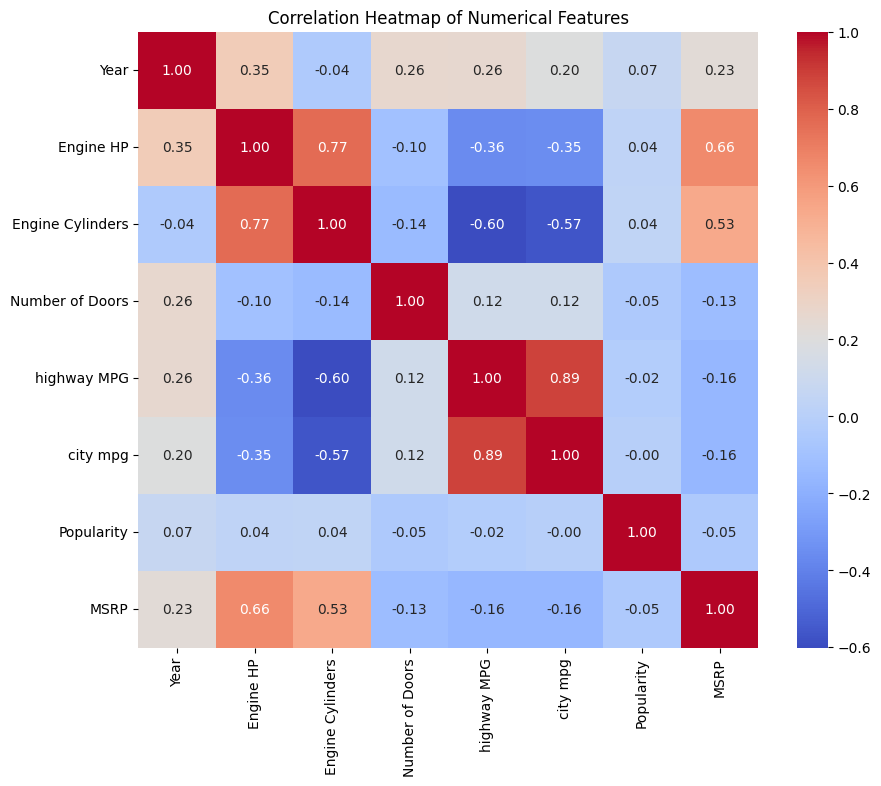

In [16]:
# Outlier Detection with Box Plots for MSRP and Engine HP
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for MSRP (capping the upper range to better visualize outliers)
sns.boxplot(data=data[data['MSRP'] < 100000], x='MSRP', ax=ax[0])
ax[0].set_title('Box Plot of MSRP (Under $100,000)')

# Box plot for Engine HP
sns.boxplot(data=data, x='Engine HP', ax=ax[1])
ax[1].set_title('Box Plot of Engine HP')

plt.tight_layout()
plt.show()

# Advanced Correlation Analysis with Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()